In [13]:
from collections import defaultdict
import nltk
import pandas as pd
import numpy as np
import seaborn as sns

Creating a dictionnary containing artists and stanzas

In [15]:
sentence = 'Longtemps, je me suis levé de bonne heure!'
nltk.word_tokenize(sentence)

['Longtemps', ',', 'je', 'me', 'suis', 'levé', 'de', 'bonne', 'heure', '!']

In [ ]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize(sentence)

['Longtemps', 'je', 'me', 'suis', 'levé', 'de', 'bonne', 'heure']

In [ ]:
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]


In [17]:
data = pd.read_csv("sample_submission.csv")
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')
data1


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [18]:
sns.set()
# loading of a graphic library

In [19]:
data1.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [20]:
data1.tail(5)

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [21]:
data1.sample(30)

,id,keyword,location,text,target
838,1217,blizzard,NaN,First Time Playing Hearthstone on PC Thoughts ...,0
5553,7924,rainstorm,Federal Capital Territory,Rainstorm Destroys 600 Houses In Yobe | iRepor...,1
1361,1963,burning%20buildings,Spying on your thoughts,@kshllcenterpri1 @Progress4Ohio burning down b...,1
2191,3139,debris,NaN,Plane debris discovered on Reunion Island belo...,1
3280,4706,epicentre,Africa,RT @calestous: Tanzania elephant population de...,1
387,560,arson,Jerusalem,Mourning notices for stabbing arson victims st...,1
3560,5088,famine,NaN,A grade in Black Horse Famine[MEGA]. Score 084...,0
7572,10823,wrecked,"Manhattan, NY",@Kirafrog @mount_wario Did you get wrecked again?,1
7518,10751,wreckage,Bangkok,CIA plot! *rolling eyes* RT @ajabrown: Chinese...,1
6199,8848,smoke,"MedellÌ_n, Antioquia",Smoke the Weed - Snoop Lion Ft. Collie Buddz,0


In [22]:
data1.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [24]:
data1.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [25]:
tmp = data1.nunique()
type(tmp)

pandas.core.series.Series

In [27]:
tmp[tmp>100]

id          7613
keyword      221
location    3341
text        7503
dtype: int64

In [28]:
data1.isna().sum()
# Combinaison of 2 methods

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [29]:
data1.isna( ).mean().sort_values()
# 33% of missing values for location. 

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

<AxesSubplot:>

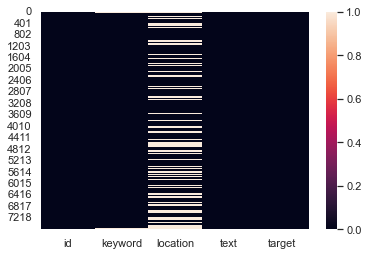

In [30]:
sns.heatmap(data1.isna())

Duplicated values

In [31]:
data1.duplicated(subset='text').sum()
for col in data1.columns:
    n = data1.duplicated(subset=col).sum()
    print(f'In the {col} column, there are {n} duplicated values')

In the id column, there are 0 duplicated values
In the keyword column, there are 7391 duplicated values
In the location column, there are 4271 duplicated values
In the text column, there are 110 duplicated values
In the target column, there are 7611 duplicated values


In [32]:
idx = data1.duplicated(subset='text', keep = 'first')
# On ne garde que la première valeur n'est pas dupliquée. 
data1.loc[idx,:].sort_values("text")

,id,keyword,location,text,target
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6366,9098,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...,...
3461,4952,exploded,NaN,that exploded &amp; brought about the\nbeginni...,0
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6123,8739,sinking,MA,that horrible sinking feeling when youÛªve be...,1


In [33]:
data1.describe(include=['int', 'float'])
# ou bien encore mieux : data1.describe(include = np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [34]:
data1.describe(include='object')
# On fait le describe unique sur les valeurs non numériques. Un tweet revient 10 fois...

,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


Nettoyage

In [38]:
Cols =['text', 'target']
data1 = data1[Cols]

In [39]:
data1.isna().sum()

text      0
target    0
dtype: int64

In [41]:
indx = data1.duplicated(subset='text', keep="first")
data1.loc[indx, :].sort_values('text')

,text,target
4299,#Allah describes piling up #wealth thinking it...,0
4312,#Allah describes piling up #wealth thinking it...,1
6366,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6392,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...
3461,that exploded &amp; brought about the\nbeginni...,0
6103,that horrible sinking feeling when youÛªve be...,0
6094,that horrible sinking feeling when youÛªve be...,0
6123,that horrible sinking feeling when youÛªve be...,1


In [42]:
data1.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [43]:
data1.target.value_counts(normalize=True) 
# normalize = True pour avoir le pourcentage. Attention par exemple 1% peut compter pour beaucoup( par exemple le cas de fraude à la carte bleue)


0    0.57034
1    0.42966
Name: target, dtype: float64

Features engineering

In [47]:
data1.describe(include='object')

,text
count,7613
unique,7503
top,11-Year-Old Boy Charged With Manslaughter of T...
freq,10


In [48]:
data1.text.apply(lambda n: len(n))

0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 7613, dtype: int64

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

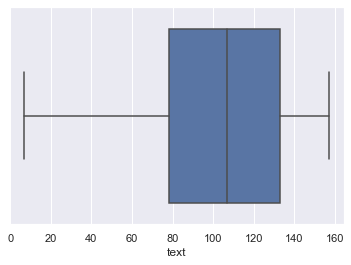

In [52]:
tmp = data1.text.str.len()
# On appelle la méthode len issue de str.
sns.boxplot(tmp)

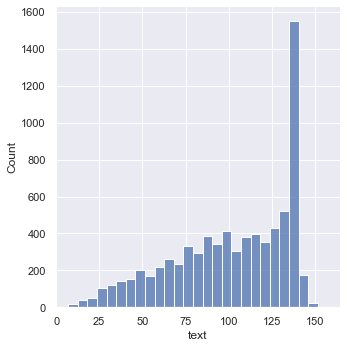

In [53]:
sns.displot(tmp)

In [58]:
data1["_len_txt"]=tmp
# On met une underscore pour montrer que c'est une variable que nous avons crée.

C:\Users\DELL\AppData\Local\Temp/ipykernel_25496/2084284143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["_len_txt"]=tmp


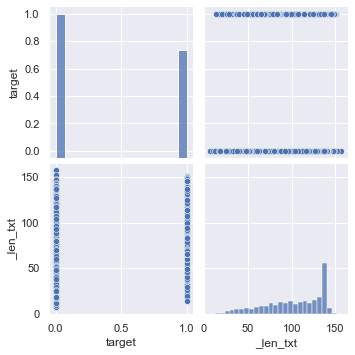

In [59]:
sns.pairplot(data1)

In [60]:
data1.sort_values("_len_txt").tail(10)

,text,target,_len_txt
6980,Just stop fucking saying ÛÏa whole Û÷nother...,0,148
257,@willienelson We need help! Horses will die!Pl...,1,148
2301,Nah but srsly b4 u demolish ur partner's face ...,0,148
261,@Barbi_Twins We need help-horses will die! Ple...,0,148
2718,@UN No more #GujaratRiot &amp; #MumbaiRiot92-9...,1,149
633,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
635,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,1,150
614,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,1,151
4801,It's was about 2:30 in the morning&amp;I went ...,0,152
1270,when you're taking a shower and someone flushe...,0,157


In [61]:
data1.sort_values("_len_txt").head(10)

,text,target,_len_txt
4890,Bad day,0,7
5115,Err:509,0,7
1882,Crushed,0,7
24,LOOOOOOL,0,8
3670,fatality,0,8
4971,Meltdown,0,8
30,The end!,0,8
3667,Fatality!,0,9
28,Cooool :),0,9
3749,I See Fire,0,10


In [ ]:
data1.drop(columns = '_len_txt', inplace=True)


In [64]:
data1.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [69]:
data1.to_csv("Cleaned/data1_Cleaned.csv", index=False)

In [73]:
data1

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


EXPlore corpus

In [92]:
df_samp = data1.sample(20)
df_samp

,text,target
3417,I'm about to explode ????,0
6334,@SirTitan45 Mega mood swing on a 24 hr schedu...,0
4874,Nazi Mass Murderer Became Chairman At Vaccine ...,1
3836,After shooting event at the theater @Starbucks...,1
4601,Traffic Collision - No Injury: I5 S at I5 S 43...,1
1607,@Marvel @DCComics @ImageComics @DarkHorseComic...,0
7523,Malaysian prime minister says Reunion Island w...,1
1941,INFO U. CLD: SCT012 BKN025. EXP INST APCH. RWY...,0
2319,Take this China get demolished and sent back t...,0
3997,#flood #disaster Bengal floods: CM Mamata Bane...,1


In [93]:
for idx, ser  in df_samp.iterrows():
    txt_output = f"target : {ser['target']}\n"
    print(txt_output + ser['text'] + "..." + "\n\n")

target : 0
I'm about to explode ????...


target : 0
@SirTitan45  Mega mood swing on a 24 hr schedule. Isn't that how structural failure occurs?...


target : 1
Nazi Mass Murderer Became Chairman At Vaccine Drug Company In... http://t.co/x713OMh6Ai...


target : 1
After shooting event at the theater @Starbucks is giving FREE COFFEE to all first responders police &amp; firefighters. AntiochHickoryHollow#TN...


target : 1
Traffic Collision - No Injury: I5 S at I5 S 43rd Ave offramp South Sac http://t.co/cT9ejXoLpu...


target : 0
@Marvel @DCComics @ImageComics @DarkHorseComics @IDWPublishing And by doing this you're enabling the possible collapse of the industry....


target : 1
Malaysian prime minister says Reunion Island wreckage is from MH370: http://t.co/bpTZAMjl2K via @slate...


target : 0
INFO U. CLD: SCT012 BKN025. EXP INST APCH. RWY 05. CURFEW IN OPER UNTIL 2030 Z. TAXIWAYS FOXTROT 5 &amp; FOXTROT 6 NAVBL. TMP: 10. WND: 030/6....


target : 0
Take this China get demolished and 